# Clustering data

## Importing Libraries

In [3]:
# Importing Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
pip install openpyxl

  Using cached openpyxl-3.0.9-py2.py3-none-any.whl (242 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


## Importing data set

In [144]:
data = pd.read_excel('Data Fiver.xlsx')
print(data.head())

      Spieler      Tore  Torvorlage  Progressive Pässe  Rückpässe  \
0  E. Haaland  5.784805    0.924841          -2.099532  -0.527450   
1   J. Sancho  3.239380    5.564156           0.198022   2.474467   
2  J. Kimmich -0.175215    1.768353           1.397004   1.372626   
3  K. Havertz  1.873542    0.713963          -0.254736   2.154695   
4   A. Davies  0.011036    0.503085           0.779202   1.570474   

   seitliche Pässe  lange Pässe  kurze Pässe  Dribbeln  Grätschen  ...  \
0        -1.350979    -2.142148    -1.430170  0.100861  -1.392833  ...   
1         0.620473    -1.272420     1.427465  1.393588  -1.392833  ...   
2         1.908364     1.548869     1.899620 -0.352134   0.917628  ...   
3         0.047055    -0.646972     0.890738  1.104575  -0.797036  ...   
4         1.046607    -0.587813     1.426581  1.400708   0.090625  ...   

    Schüsse  Ballberührungen im 16er  erlittene Fouls   Flanken  \
0  1.524427                 1.783461        -1.061558 -0.433364   
1  0.9

## Removing the Player , we will deal with Descriptive features only.

In [145]:
descriptive_features = data.iloc[:,1:]
descriptive_features

,Tore,Torvorlage,Progressive Pässe,Rückpässe,seitliche Pässe,lange Pässe,kurze Pässe,Dribbeln,Grätschen,Abfangen,...,Schüsse,Ballberührungen im 16er,erlittene Fouls,Flanken,clevere Pässe,Progressive Läufe,Besschleunigungen,erhaltene Pässe,Angriffsläufe,Fouls
0,5.784805,0.924841,-2.099532,-0.527450,-1.350979,-2.142148,-1.430170,0.100861,-1.392833,-1.073046,...,1.524427,1.783461,-1.061558,-0.433364,0.068768,-0.250572,-0.161448,-1.136759,0.772772,-0.553050
1,3.239380,5.564156,0.198022,2.474467,0.620473,-1.272420,1.427465,1.393588,-1.392833,-1.327431,...,0.994731,1.664423,-0.810551,0.308628,2.225275,1.891940,1.547451,1.531222,3.045627,-1.824754
2,-0.175215,1.768353,1.397004,1.372626,1.908364,1.548869,1.899620,-0.352134,0.917628,1.177042,...,-0.389088,-0.488539,0.399594,0.501108,1.156993,0.085164,-0.528285,1.961430,1.891424,-0.705659
3,1.873542,0.713963,-0.254736,2.154695,0.047055,-0.646972,0.890738,1.104575,-0.797036,-0.661339,...,1.053056,1.492230,0.155675,-0.008817,0.955218,1.017857,0.916497,0.981757,1.739431,-0.727938
4,0.011036,0.503085,0.779202,1.570474,1.046607,-0.587813,1.426581,1.400708,0.090625,1.710778,...,-0.701413,0.409628,0.371839,1.230801,0.087508,1.814248,1.259604,1.161058,0.691518,-0.385413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,-0.733966,0.081329,0.848617,-1.991376,0.860062,0.798960,0.369085,-1.951584,0.299024,1.286284,...,-1.156367,-0.585955,-1.381500,-1.181373,-1.035425,-0.752440,-1.432215,0.265115,-1.072731,0.479787
1273,1.749375,-0.762183,-1.952773,0.170887,-1.448086,-1.783394,-1.414592,0.414955,-1.392833,-0.835924,...,1.019894,1.108325,0.200084,-0.838141,-1.262574,-0.177506,-0.054467,-1.357008,0.344816,-0.750341
1274,-0.733966,-0.762183,0.734451,-0.561013,0.532536,1.248445,0.126650,-0.276228,0.066707,0.054994,...,-1.713187,-1.133146,-0.540483,0.807511,-0.799180,0.243341,-0.272848,0.336782,-0.650954,0.275861
1275,-0.733966,-0.762183,0.486326,0.060247,0.699246,1.324764,0.371126,-0.543247,2.351819,0.027803,...,-0.374453,-1.690191,0.521616,-0.214257,-1.262574,-0.189544,-1.059609,0.205447,0.591288,-0.447465


## Converting in to np Array

In [146]:
descriptive_features = data.iloc[:,1:].values
descriptive_features

array([[ 5.78480479,  0.92484095, -2.09953172, ..., -1.13675936,
         0.77277234, -0.55305004],
       [ 3.23937984,  5.56415562,  0.19802171, ...,  1.53122212,
         3.04562738, -1.82475417],
       [-0.17521461,  1.76835271,  1.39700416, ...,  1.96143029,
         1.89142359, -0.7056591 ],
       ...,
       [-0.73396643, -0.76218256,  0.73445102, ...,  0.33678184,
        -0.65095436,  0.27586128],
       [-0.73396643, -0.76218256,  0.486326  , ...,  0.20544715,
         0.59128811, -0.44746545],
       [ 0.50770428,  1.34659683, -1.1336849 , ..., -0.47285337,
         0.72426094,  2.11934959]])

## Min max scaler for normalising data

In [147]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(descriptive_features))

print(scaler.data_max_)
descriptive_features = scaler.transform(descriptive_features)


MinMaxScaler()
[ 6.09522247  7.88381295  2.00156902  2.50317535  2.56535296  2.56800232
  2.60965054  2.74068145  5.47555091  2.29227947  2.59846667  4.92456736
  2.66464978  6.20544881  3.00280343  2.97484475 12.3588791   2.76754472
  2.775511    2.60476519  3.04562738  2.89143164]


In [148]:
descriptive_features

array([[0.95454545, 0.19512195, 0.36027592, ..., 0.62398529, 0.50963214,
        0.42769216],
       [0.58181818, 0.73170732, 0.71866757, ..., 0.89211136, 1.        ,
        0.21639585],
       [0.08181818, 0.29268293, 0.9056949 , ..., 0.9353463 , 0.75098085,
        0.40233584],
       ...,
       [0.        , 0.        , 0.80234431, ..., 0.77207283, 0.2024635 ,
        0.56541751],
       [0.        , 0.        , 0.76363969, ..., 0.75887399, 0.47047697,
        0.44523526],
       [0.18181818, 0.24390244, 0.5109368 , ..., 0.69070633, 0.49916582,
        0.87171695]])

## Finding the optimum number of clusters for k-means classification

The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum-of-squares criterion. Inertia can be recognized as a measure of how internally coherent clusters are. This is what the KMeans tries to minimize with each iteration.

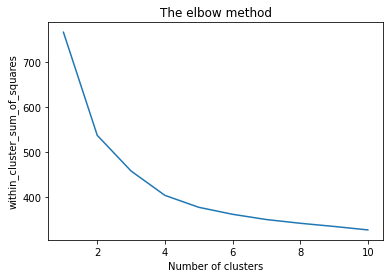

In [149]:
#  Elbow Method 
from sklearn.cluster import KMeans
within_cluster_sum_of_squares = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(descriptive_features)
    within_cluster_sum_of_squares.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), within_cluster_sum_of_squares)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('within_cluster_sum_of_squares') #within cluster sum of squares
plt.show()


## Apply K-means Clustering for 4 clusters

In [150]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
k_means_4_clusters = kmeans.fit_predict(descriptive_features)

In [151]:
k_means_4_clusters

array([0, 2, 1, ..., 1, 1, 0], dtype=int32)

## checking size of each cluster

In [152]:
count_arr = np.bincount(k_means_4_clusters)
print(count_arr)

[202 467 298 310]


## Evaluation Metrics

In [153]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
score = silhouette_score(descriptive_features, kmeans.labels_, metric='euclidean')
score2 = calinski_harabasz_score(descriptive_features, kmeans.labels_)
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)
print('calinski_harabasz Score: %.3f' % score2)

Silhouetter Score: 0.200
calinski_harabasz Score: 382.309


## Apply K-means Clustering for 8 clusters

In [154]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
k_means_8_clusters = kmeans.fit_predict(descriptive_features)

In [155]:
k_means_8_clusters


array([1, 2, 5, ..., 3, 0, 1], dtype=int32)

## checking size of each cluster

In [156]:
count_arr = np.bincount(k_means_8_clusters)
print(count_arr)

[193 161 122 218 124 171 163 125]


## Evaluation Metrics

In [157]:
score = silhouette_score(descriptive_features, kmeans.labels_, metric='euclidean')
score2 = calinski_harabasz_score(descriptive_features, kmeans.labels_)
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)
print('calinski_harabasz Score: %.3f' % score2)

Silhouetter Score: 0.122
calinski_harabasz Score: 225.169


## Adding Cluster column in to CSV File

In [158]:
df = pd.DataFrame(data=k_means_4_clusters,columns=["Column1"])
data = data.assign(Kmeans_4_clusters =k_means_4_clusters)
df = pd.DataFrame(data=k_means_8_clusters,columns=["Column1"])
data = data.assign(Kmeans_8_clusters =k_means_8_clusters)


#print(data)
data.to_csv('Clusterednew.csv')
print(data.head())

      Spieler      Tore  Torvorlage  Progressive Pässe  Rückpässe  \
0  E. Haaland  5.784805    0.924841          -2.099532  -0.527450   
1   J. Sancho  3.239380    5.564156           0.198022   2.474467   
2  J. Kimmich -0.175215    1.768353           1.397004   1.372626   
3  K. Havertz  1.873542    0.713963          -0.254736   2.154695   
4   A. Davies  0.011036    0.503085           0.779202   1.570474   

   seitliche Pässe  lange Pässe  kurze Pässe  Dribbeln  Grätschen  ...  \
0        -1.350979    -2.142148    -1.430170  0.100861  -1.392833  ...   
1         0.620473    -1.272420     1.427465  1.393588  -1.392833  ...   
2         1.908364     1.548869     1.899620 -0.352134   0.917628  ...   
3         0.047055    -0.646972     0.890738  1.104575  -0.797036  ...   
4         1.046607    -0.587813     1.426581  1.400708   0.090625  ...   

   erlittene Fouls   Flanken  clevere Pässe  Progressive Läufe  \
0        -1.061558 -0.433364       0.068768          -0.250572   
1       

# K Medoids

In [159]:
pip install scikit-learn-extra

Note: you may need to restart the kernel to use updated packages.


In [160]:
#Applying kmeans to the dataset / Creating the kmeans classifier
from sklearn_extra.cluster import KMedoids
k_medions = KMedoids(n_clusters=4, metric='manhattan', method='alternate', init='heuristic', max_iter=600, random_state=False)
k_medions_4_clusters = k_medions.fit_predict(descriptive_features)

## checking size of each cluster

In [161]:
k_medions_4_clusters
count_arr = np.bincount(k_medions_4_clusters)
print(count_arr)

[321 368 335 253]


## Evaluation Metrics

In [162]:
score = silhouette_score(descriptive_features, k_medions.labels_, metric='euclidean')
score2 = calinski_harabasz_score(descriptive_features, k_medions.labels_)
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)
print('calinski_harabasz Score: %.3f' % score2)

Silhouetter Score: 0.159
calinski_harabasz Score: 298.474


In [163]:
#Applying kmeans to the dataset / Creating the kmeans classifier
from sklearn_extra.cluster import KMedoids
k_medions = KMedoids(n_clusters=8, metric='manhattan', method='alternate', init='heuristic', max_iter=600, random_state=False)
k_medions_8_clusters = k_medions.fit_predict(descriptive_features)

## checking size of each cluster

In [164]:
k_medions_8_clusters
count_arr = np.bincount(k_medions_8_clusters)
print(count_arr)

[137 207 128  89 148 167 220 181]


## Evaluation Metrics

In [165]:
score = silhouette_score(descriptive_features, k_medions.labels_, metric='euclidean')
score2 = calinski_harabasz_score(descriptive_features, k_medions.labels_)
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)
print('calinski_harabasz Score: %.3f' % score2)

Silhouetter Score: 0.079
calinski_harabasz Score: 183.622


## Adding Cluster column in to CSV File

In [166]:
df = pd.DataFrame(data=k_medions_4_clusters,columns=["Column1"])
data = data.assign(k_medions_4_clusters =k_medions_4_clusters)
df = pd.DataFrame(data=k_medions_8_clusters,columns=["Column1"])
data = data.assign(k_medions_8_clusters =k_medions_8_clusters)


#print(data)
data.to_csv('Clusterednew.csv')
print(data.head())

      Spieler      Tore  Torvorlage  Progressive Pässe  Rückpässe  \
0  E. Haaland  5.784805    0.924841          -2.099532  -0.527450   
1   J. Sancho  3.239380    5.564156           0.198022   2.474467   
2  J. Kimmich -0.175215    1.768353           1.397004   1.372626   
3  K. Havertz  1.873542    0.713963          -0.254736   2.154695   
4   A. Davies  0.011036    0.503085           0.779202   1.570474   

   seitliche Pässe  lange Pässe  kurze Pässe  Dribbeln  Grätschen  ...  \
0        -1.350979    -2.142148    -1.430170  0.100861  -1.392833  ...   
1         0.620473    -1.272420     1.427465  1.393588  -1.392833  ...   
2         1.908364     1.548869     1.899620 -0.352134   0.917628  ...   
3         0.047055    -0.646972     0.890738  1.104575  -0.797036  ...   
4         1.046607    -0.587813     1.426581  1.400708   0.090625  ...   

   clevere Pässe  Progressive Läufe  Besschleunigungen  erhaltene Pässe  \
0       0.068768          -0.250572          -0.161448        -1.

## Hierarchical Clustering

In [167]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)
Hierarchical_clustering_4_clusters=cluster.fit_predict(descriptive_features)
Hierarchical_clustering_4_clusters

array([3, 1, 2, ..., 2, 0, 3])

## checking size of each cluster

In [168]:
Hierarchical_clustering_4_clusters
count_arr = np.bincount(Hierarchical_clustering_4_clusters)
print(count_arr)

[403 294 408 172]


## Evaluation Metrics

In [169]:
score = silhouette_score(descriptive_features, cluster.labels_, metric='euclidean')
score2 = calinski_harabasz_score(descriptive_features, cluster.labels_)
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)
print('calinski_harabasz Score: %.3f' % score2)

Silhouetter Score: 0.168
calinski_harabasz Score: 328.656


In [170]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)

Hierarchical_clustering_8_clusters=cluster.fit_predict(descriptive_features)
Hierarchical_clustering_8_clusters

array([3, 6, 2, ..., 1, 4, 3])

## checking size of each cluster

In [171]:
Hierarchical_clustering_8_clusters
count_arr = np.bincount(Hierarchical_clustering_8_clusters)
print(count_arr)

[197 223 185 114 161 242  97  58]


## Evaluation Metrics

In [172]:
score = silhouette_score(descriptive_features, cluster.labels_, metric='euclidean')
score2 = calinski_harabasz_score(descriptive_features, cluster.labels_)
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)
print('calinski_harabasz Score: %.3f' % score2)

Silhouetter Score: 0.106
calinski_harabasz Score: 197.337


## Adding Cluster column in to CSV File

In [173]:
df = pd.DataFrame(data=Hierarchical_clustering_4_clusters,columns=["Column1"])
data = data.assign(Hierarchical_clustering_4_clusters =Hierarchical_clustering_4_clusters)
df = pd.DataFrame(data=Hierarchical_clustering_8_clusters,columns=["Column1"])
data = data.assign(Hierarchical_clustering_8_clusters =Hierarchical_clustering_8_clusters)


#print(data)
data.to_csv('Clusterednew.csv')
print(data.head())

      Spieler      Tore  Torvorlage  Progressive Pässe  Rückpässe  \
0  E. Haaland  5.784805    0.924841          -2.099532  -0.527450   
1   J. Sancho  3.239380    5.564156           0.198022   2.474467   
2  J. Kimmich -0.175215    1.768353           1.397004   1.372626   
3  K. Havertz  1.873542    0.713963          -0.254736   2.154695   
4   A. Davies  0.011036    0.503085           0.779202   1.570474   

   seitliche Pässe  lange Pässe  kurze Pässe  Dribbeln  Grätschen  ...  \
0        -1.350979    -2.142148    -1.430170  0.100861  -1.392833  ...   
1         0.620473    -1.272420     1.427465  1.393588  -1.392833  ...   
2         1.908364     1.548869     1.899620 -0.352134   0.917628  ...   
3         0.047055    -0.646972     0.890738  1.104575  -0.797036  ...   
4         1.046607    -0.587813     1.426581  1.400708   0.090625  ...   

   Besschleunigungen  erhaltene Pässe  Angriffsläufe     Fouls  \
0          -0.161448        -1.136759       0.772772 -0.553050   
1       

## Get the important features. 

### There are no such methods for unsupervised methods for important feature extrction as there are for supervised. I tried a method, but i dont think so it would be really helpful for you. But you can have a look. 

In [176]:
#getting copy of descriptive features
data = descriptive_features
type(data)

numpy.ndarray

In [177]:
data

array([[0.95454545, 0.19512195, 0.36027592, ..., 0.62398529, 0.50963214,
        0.42769216],
       [0.58181818, 0.73170732, 0.71866757, ..., 0.89211136, 1.        ,
        0.21639585],
       [0.08181818, 0.29268293, 0.9056949 , ..., 0.9353463 , 0.75098085,
        0.40233584],
       ...,
       [0.        , 0.        , 0.80234431, ..., 0.77207283, 0.2024635 ,
        0.56541751],
       [0.        , 0.        , 0.76363969, ..., 0.75887399, 0.47047697,
        0.44523526],
       [0.18181818, 0.24390244, 0.5109368 , ..., 0.69070633, 0.49916582,
        0.87171695]])

In [178]:
data = pd.DataFrame(data)

In [179]:
data

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.954545,0.195122,0.360276,0.579960,0.486519,0.056705,0.632816,0.453069,0.000000,0.478317,...,0.739547,0.439946,0.236968,0.235225,0.097739,0.397207,0.334822,0.623985,0.509632,0.427692
1,0.581818,0.731707,0.718668,0.996021,0.745001,0.230884,0.892550,0.720902,0.000000,0.438883,...,0.618552,0.424869,0.284091,0.401722,0.256056,0.825120,0.721862,0.892111,1.000000,0.216396
2,0.081818,0.292683,0.905695,0.843308,0.913860,0.795900,0.935464,0.359215,0.336391,0.827119,...,0.302455,0.152192,0.511281,0.444913,0.177629,0.464261,0.251739,0.935346,0.750981,0.402336
3,0.381818,0.170732,0.648043,0.951701,0.669819,0.356142,0.843766,0.661023,0.086745,0.542139,...,0.631874,0.403060,0.465488,0.330490,0.162816,0.650544,0.578961,0.836891,0.718189,0.398634
4,0.109091,0.146341,0.809325,0.870729,0.800873,0.367990,0.892469,0.722378,0.215984,0.909857,...,0.231113,0.265947,0.506070,0.608650,0.099114,0.809603,0.656669,0.854911,0.492102,0.455545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,0.000000,0.097561,0.820153,0.377062,0.776415,0.645717,0.796352,0.027833,0.246325,0.844053,...,0.127191,0.139854,0.176903,0.067378,0.016676,0.296971,0.047012,0.764871,0.111465,0.599300
1273,0.363636,0.000000,0.383169,0.676749,0.473787,0.128552,0.634231,0.518144,0.000000,0.515075,...,0.624300,0.354438,0.473825,0.144396,0.000000,0.411800,0.359052,0.601851,0.417301,0.394912
1274,0.000000,0.000000,0.802344,0.575308,0.733472,0.735734,0.774317,0.374942,0.212501,0.653183,...,0.000000,0.070551,0.334793,0.513668,0.034019,0.495853,0.309591,0.772073,0.202463,0.565418
1275,0.000000,0.000000,0.763640,0.661414,0.755330,0.751019,0.796538,0.319620,0.545201,0.648968,...,0.305798,0.000000,0.534189,0.284391,0.000000,0.409396,0.131402,0.758874,0.470477,0.445235


## Variance threshold method for feature extraction 

In [180]:
from sklearn.feature_selection import VarianceThreshold
threshold_n=0.95
sel = VarianceThreshold(threshold=(1 - threshold_n))
sel_var=sel.fit_transform(data)
data[data.columns[sel.get_support(indices=True)]] 

,12,15,18
0,0.739547,0.235225,0.334822
1,0.618552,0.401722,0.721862
2,0.302455,0.444913,0.251739
3,0.631874,0.330490,0.578961
4,0.231113,0.608650,0.656669
...,...,...,...
1272,0.127191,0.067378,0.047012
1273,0.624300,0.144396,0.359052
1274,0.000000,0.513668,0.309591
1275,0.305798,0.284391,0.131402
